In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ABM as abm
import uuid 
import matplotlib.colors as col

%matplotlib inline

In [2]:
np.random.seed(12345678)

In [3]:
grid = abm.Grid(20,20, 0.2, 0, 4, 0, 8, 0, 0.2, 2, 0.5)

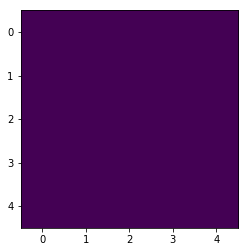

In [40]:
class Explorer(object):
    __slots__ = ['_ID', '_map', '_NN', '_route']

    def __init__(self, env_shape, _NN=None):
        self._ID = "".join(['E', str(uuid.uuid4())])
        self._map = np.zeros(env_shape)
        # self._NN = <some DQN instance>
        self._route = []
        
    def action(self, data_in):
        """
        propagate input data through the NN and calculate new parameters for the next turn -> self._NN
        """
        pass
    
    def explore(self):
        pass

a = Explorer((5,5))
a._ID
plt.imshow(a._map, cmap=cm)
        


In [5]:
def grid2scatter(grid):
    y, x = np.where(grid.get_grid() != '')
    return y,x

y, x = grid2scatter(grid)

In [33]:
lb = plt.cm.coolwarm(0)
ub = plt.cm.coolwarm(255)
mid = plt.cm.gist_gray(0)
cm = col.LinearSegmentedColormap.from_list('newCM', [lb, mid, ub])


In [72]:
cmlist = []
segments = [(0, 127), (127, 129), (129, 256)]
cms = [plt.cm.jet, plt.cm.gist_gray, plt.cm.jet]
for j,s in enumerate(segments):
    l,u = s
    for n in range(l,u):
        cmlist.append(cms[j](n))
#print(cmlist)
cm = col.LinearSegmentedColormap.from_list('newCM', cmlist)
#col.LinearSegmentedColormap.from_list?

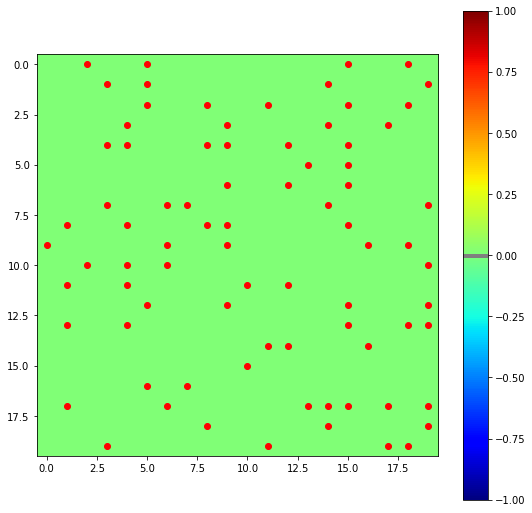

In [77]:
data = np.random.rand(400)*2 - 1
data = data.reshape(20,20)
plt.figure(figsize=(9,9))
test = np.zeros_like(data)+0.01
im = plt.imshow(test, vmin=-1, vmax=1, cmap=cm)
plt.scatter(x, y, color='r', marker='o')
#plt.scatter(i,j, color='k', marker='.')
plt.colorbar(im)

In [53]:
for agent in grid._preydict.values():
    agent._map = np.zeros(data.shape)


AttributeError: 'Prey' object has no attribute '_map'

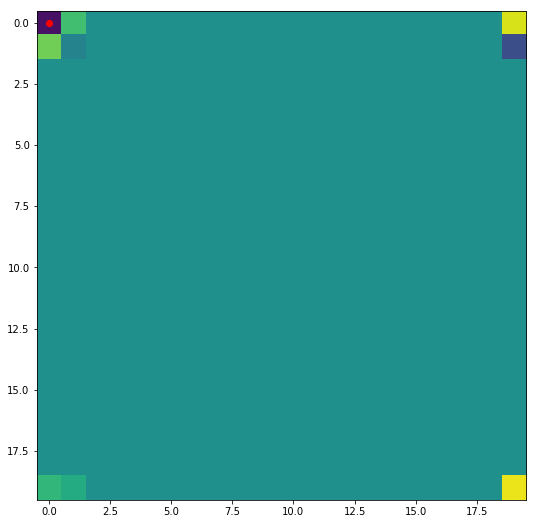

In [24]:
plt.figure(figsize=(9,9))
ID = grid._grid[0,0]
agentdata = grid._preydict[ID]._map
agent = grid._preydict[ID]

idx_nbh, nbh = grid.get_Nbh([0,0])
for i in idx_nbh:
    k, j = i
    agentdata[k,j] = data[k,j]

plt.imshow(agentdata, vmin=-1, vmax=1)
plt.scatter(0,0,color='red',marker='o')


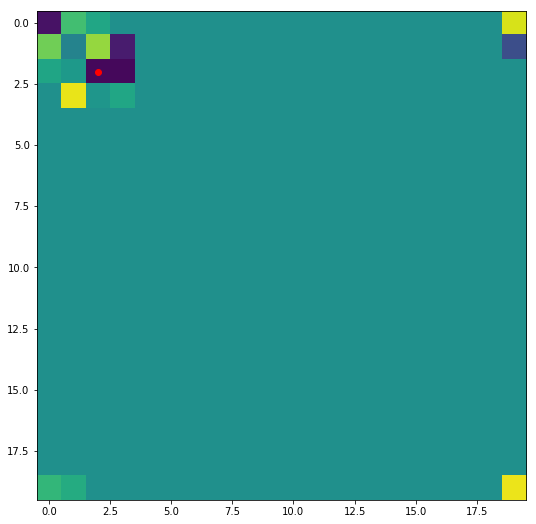

In [31]:
#grid.Move([0,0], direction=[1,1])
plt.figure(figsize=(9,9))
idx_nbh, nbh = grid.get_Nbh([2,2])
for i in idx_nbh:
    k, j = i
    agentdata[k,j] = data[k,j]
plt.imshow(agentdata, vmin=-1, vmax=1)
plt.scatter(2,2,color='red',marker='o')